# <u>Heart Disease Detection

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

### Loading Dataset

In [2]:
columns = [
    "age","sex","cp","trestbps","chol","fbs","restecg",
    "thalach","exang","oldpeak","slope","ca","thal","target"
]

cleveland = pd.read_csv("processed.cleveland.data", names=columns)
hungarian = pd.read_csv("processed.hungarian.data", names=columns)
switzerland = pd.read_csv("processed.switzerland.data", names=columns)
va = pd.read_csv("processed.va.data", names=columns)

print("Cleveland:", cleveland.shape)
print("Hungarian:", hungarian.shape)
print("Switzerland:", switzerland.shape)
print("VA:", va.shape)

Cleveland: (303, 14)
Hungarian: (294, 14)
Switzerland: (123, 14)
VA: (200, 14)


In [3]:
# Combine all 4 data
df = pd.concat([cleveland, hungarian, switzerland, va], ignore_index=True)

print("Combined Shape:", df.shape)

Combined Shape: (920, 14)


In [4]:
df.replace('?', np.nan, inplace=True)

print("Missing Values Per Column:")
print(df.isnull().sum())

Missing Values Per Column:
age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64


In [5]:
df = df.apply(pd.to_numeric)

In [6]:
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric)

In [7]:
print(df.isnull().sum())

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64


In [8]:
# filling null values with median values
df.fillna(df.median(), inplace=True)

In [9]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

In [11]:
print(df.shape)

(920, 14)


In [12]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 2


In [13]:
heart_dataset = df

In [14]:
# showing dataset
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Data Processing

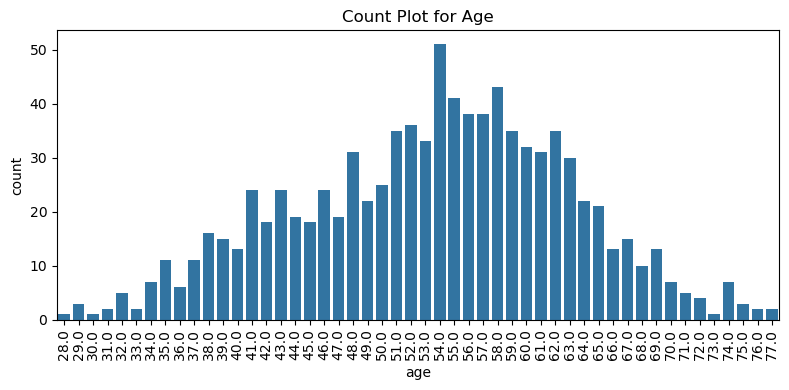

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(x=heart_dataset["age"])
plt.title("Count Plot for Age")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

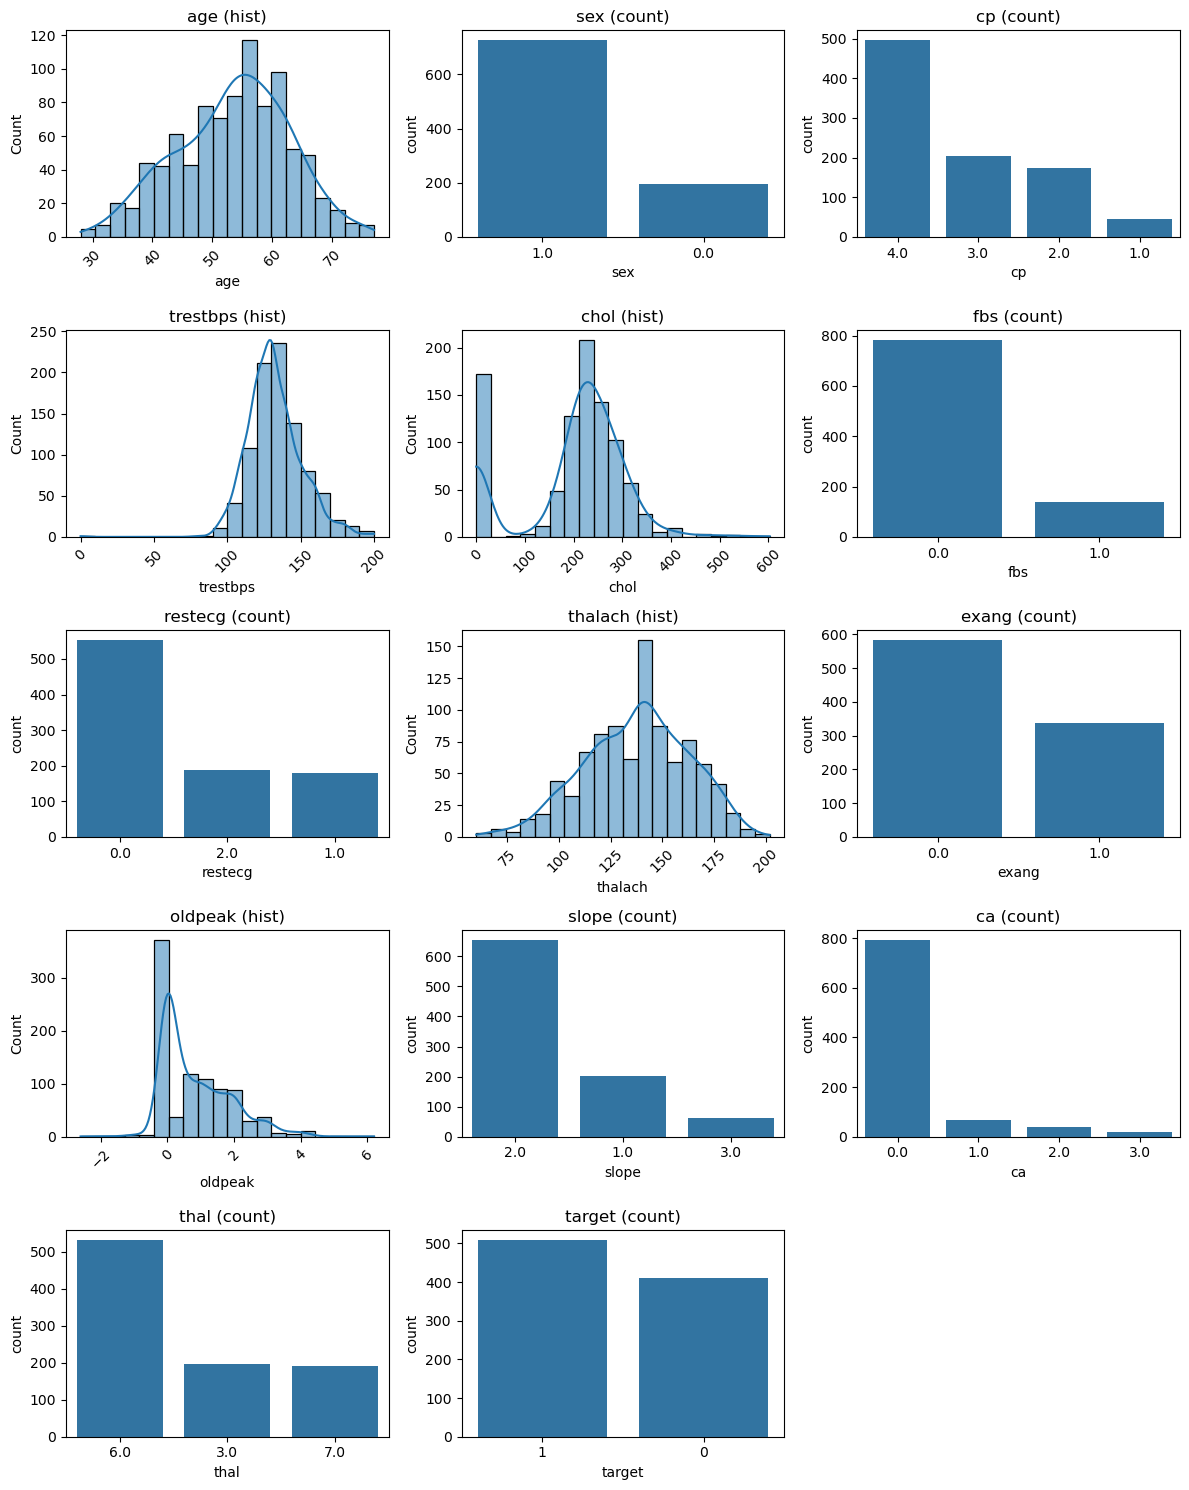

In [16]:
import math, matplotlib.pyplot as plt, seaborn as sns, pandas as pd
df = heart_dataset.copy()
cols = df.columns.tolist(); n = len(cols); ncols = 3
nrows = math.ceil(n/ncols); fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3)); axs = axs.flatten()

for i,c in enumerate(cols):
    s = df[c].dropna(); ax = axs[i]
    if pd.api.types.is_numeric_dtype(s) and s.nunique()>15:
        sns.histplot(s, bins=20, kde=True, ax=ax); ax.set_title(f"{c} (hist)")
    else:
        sns.countplot(x=s, order=s.value_counts().index, ax=ax); ax.set_title(f"{c} (count)")
    if s.nunique()>6: ax.tick_params(axis='x', rotation=45)

for j in range(i+1, len(axs)): axs[j].axis('off')
plt.tight_layout(); plt.show()

In [17]:
# showing dataset information
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    float64
 6   restecg   920 non-null    float64
 7   thalach   920 non-null    float64
 8   exang     920 non-null    float64
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    float64
 11  ca        920 non-null    float64
 12  thal      920 non-null    float64
 13  target    920 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 100.8 KB


In [18]:
# data distribution
heart_dataset["target"].value_counts()

target
1    509
0    411
Name: count, dtype: int64

In [19]:
# statistical measures of dataset
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,3.250000,131.995652,199.908696,0.150000,0.603261,137.692391,0.366304,0.853261,1.847826,0.227174,5.569565,0.553261
std,9.424685,0.408148,0.930969,18.451300,109.040171,0.357266,0.805443,25.145235,0.482056,1.058049,0.516007,0.628936,1.393888,0.497426
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,177.750000,0.000000,0.000000,120.000000,0.000000,0.000000,2.000000,0.000000,6.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,0.000000,6.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [20]:
# correlation 
correlation = heart_dataset.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,0.056889,0.166245,0.230784,-0.086010,0.219915,0.213651,-0.349715,0.160910,0.233550,0.077087,0.219413,0.053202,0.282700
sex,0.056889,1.000000,0.170392,-0.002145,-0.194029,0.075370,-0.016442,-0.174590,0.155204,0.090794,0.105805,-0.037847,0.293586,0.307284
cp,0.166245,0.170392,1.000000,0.024388,-0.131964,0.021265,0.032288,-0.338965,0.401888,0.235356,0.110992,0.079447,0.182801,0.471712
trestbps,0.230784,-0.002145,0.024388,1.000000,0.089484,0.143709,0.095434,-0.104747,0.153835,0.161217,0.050446,0.039092,0.054548,0.101273
chol,-0.086010,-0.194029,-0.131964,0.089484,1.000000,0.089316,0.112681,0.226047,-0.033914,0.047454,-0.033221,0.152514,-0.117764,-0.228976
fbs,0.219915,0.075370,0.021265,0.143709,0.089316,1.000000,0.142750,-0.026472,-0.003475,0.034112,0.070830,0.061260,0.057686,0.108071
restecg,0.213651,-0.016442,0.032288,0.095434,0.112681,0.142750,1.000000,0.052745,0.021583,0.111521,-0.043313,0.257590,-0.114473,0.062304
thalach,-0.349715,-0.174590,-0.338965,-0.104747,0.226047,-0.026472,0.052745,1.000000,-0.354173,-0.149401,-0.289251,0.038207,-0.270029,-0.381864
exang,0.160910,0.155204,0.401888,0.153835,-0.033914,-0.003475,0.021583,-0.354173,1.000000,0.395650,0.193716,0.037478,0.205758,0.433605
oldpeak,0.233550,0.090794,0.235356,0.161217,0.047454,0.034112,0.111521,-0.149401,0.395650,1.000000,0.256223,0.218412,0.152280,0.366138


<Axes: >

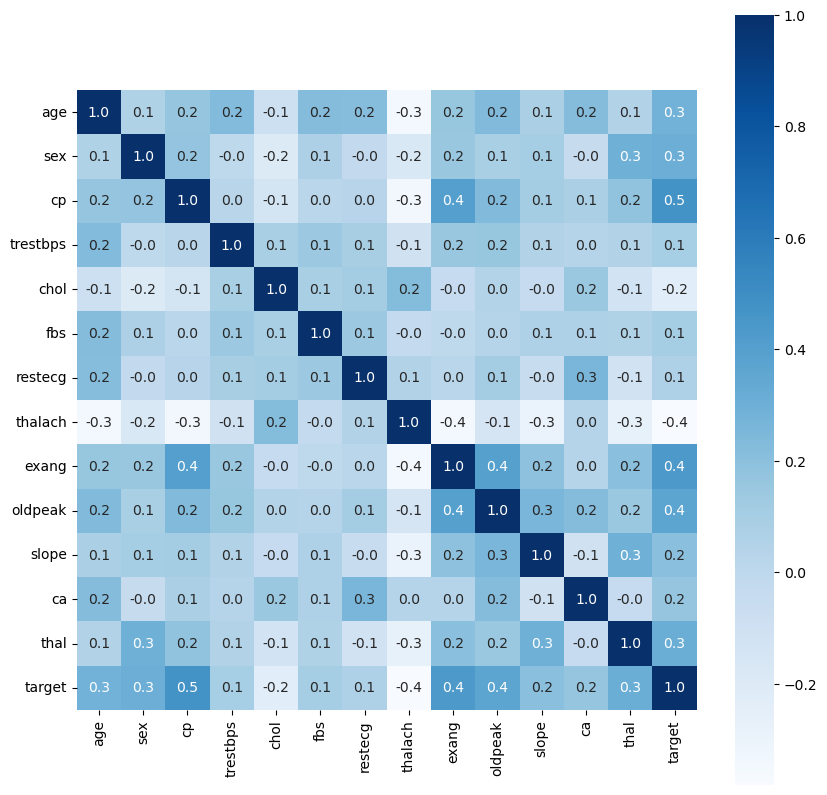

In [21]:
# visualise correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {"size": 10}, cmap = "Blues")

In [22]:
# separating features and target
X = heart_dataset.drop(["target"], axis = 1)
Y = heart_dataset["target"]

In [23]:
print(X)
print(Y)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
915  54.0  0.0  4.0     127.0  333.0  1.0      1.0    154.0    0.0      0.0   
916  62.0  1.0  1.0     130.0  139.0  0.0      1.0    140.0    0.0      0.5   
917  55.0  1.0  4.0     122.0  223.0  1.0      1.0    100.0    0.0      0.0   
918  58.0  1.0  4.0     130.0  385.0  1.0      2.0    140.0    0.0      0.5   
919  62.0  1.0  2.0     120.0  254.0  0.0      2.0     93.0    1.0      0.0   

     slope   ca  thal  
0      3.0  0.0   6.0  
1  

### Split, Train and Test data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [25]:
print("Total data: ", X.shape)
print("Train data: ", X_train.shape)
print("Test data: ", X_test.shape)

Total data:  (920, 13)
Train data:  (736, 13)
Test data:  (184, 13)


In [26]:
print(X_train)
print(Y_train)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
804  65.0  1.0  4.0     136.0  248.0  0.0      0.0    140.0    1.0      4.0   
20   64.0  1.0  1.0     110.0  211.0  0.0      2.0    144.0    1.0      1.8   
608  41.0  1.0  4.0     125.0    0.0  0.0      0.0    176.0    0.0      1.6   
715  70.0  1.0  4.0     115.0    0.0  0.0      1.0     92.0    1.0      0.0   
315  35.0  0.0  1.0     120.0  160.0  0.0      1.0    185.0    0.0      0.0   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
557  44.0  1.0  4.0     130.0  290.0  0.0      0.0    100.0    1.0      2.0   
742  63.0  1.0  3.0     130.0    0.0  0.0      1.0    111.0    1.0      0.0   
733  63.0  1.0  3.0     130.0    0.0  0.0      2.0    140.0    0.0      0.5   
252  64.0  1.0  4.0     128.0  263.0  0.0      0.0    105.0    1.0      0.2   
695  62.0  1.0  4.0     150.0    0.0  0.0      1.0     78.0    0.0      2.0   

     slope   ca  thal  
804    3.0  0.0   6.0  
20 

## Training and Evaluation of Different Models

## 1. Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log_model = LogisticRegression(max_iter = 2000)

In [29]:
log_model.fit(X_train, Y_train)

LogisticRegression(max_iter=2000)

In [30]:
# Accuracy on training data
X_train_prediction = log_model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy on training data: ", training_data_accuracy)

# Accuracy on test data
X_test_prediction = log_model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy on test data: ", test_data_accuracy)

print("\nClassification Report:\n")
print(classification_report(Y_test, X_test_prediction))

print("\nConfusion Matrix:\n")
print(confusion_matrix(Y_test, X_test_prediction))

Accuracy on training data:  0.8192934782608695
Accuracy on test data:  0.8043478260869565

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        82
           1       0.80      0.86      0.83       102

    accuracy                           0.80       184
   macro avg       0.81      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184


Confusion Matrix:

[[60 22]
 [14 88]]


## 2. Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf_model = RandomForestClassifier(n_estimators=200,max_depth=6,random_state=42)

In [33]:
rf_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=6, n_estimators=200, random_state=42)

In [34]:
# Accuracy on training data
X_train_prediction = rf_model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy on training data: ", training_data_accuracy)

# ----- Custom Threshold = 0.4 -----

# Get probabilities for class 1
y_prob = rf_model.predict_proba(X_test)[:, 1]

threshold = 0.4
X_test_prediction = (y_prob >= threshold).astype(int)

test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print("Accuracy on test data:", test_data_accuracy)

print("\nClassification Report:\n")
print(classification_report(Y_test, X_test_prediction))

print("\nConfusion Matrix:\n")
print(confusion_matrix(Y_test, X_test_prediction))

Accuracy on training data:  0.8940217391304348
Accuracy on test data: 0.8206521739130435

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.65      0.76        82
           1       0.77      0.96      0.86       102

    accuracy                           0.82       184
   macro avg       0.85      0.80      0.81       184
weighted avg       0.84      0.82      0.81       184


Confusion Matrix:

[[53 29]
 [ 4 98]]


## 3. Support Vector Machine (SVM)

In [35]:
from sklearn.svm import SVC

In [36]:
svm_model = SVC(kernel='rbf', probability=True)

In [37]:
svm_model.fit(X_train, Y_train)

SVC(probability=True)

In [38]:
# Accuracy on training data
X_train_prediction = svm_model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy on training data: ", training_data_accuracy)

# Accuracy on test data
X_test_prediction = svm_model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy on test data: ", test_data_accuracy)

print("\nClassification Report:\n")
print(classification_report(Y_test, X_test_prediction))

print("\nConfusion Matrix:\n")
print(confusion_matrix(Y_test, X_test_prediction))

Accuracy on training data:  0.7051630434782609
Accuracy on test data:  0.7554347826086957

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        82
           1       0.80      0.75      0.77       102

    accuracy                           0.76       184
   macro avg       0.75      0.76      0.75       184
weighted avg       0.76      0.76      0.76       184


Confusion Matrix:

[[63 19]
 [26 76]]


## 4. K-Nearest Neighbors (KNN)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [41]:
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [42]:
# Accuracy on training data
X_train_prediction = knn_model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy on training data: ", training_data_accuracy)

# Accuracy on test data
X_test_prediction = knn_model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy on test data: ", test_data_accuracy)

print("\nClassification Report:\n")
print(classification_report(Y_test, X_test_prediction))

print("\nConfusion Matrix:\n")
print(confusion_matrix(Y_test, X_test_prediction))

Accuracy on training data:  0.7894021739130435
Accuracy on test data:  0.6739130434782609

Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.59      0.62        82
           1       0.69      0.75      0.72       102

    accuracy                           0.67       184
   macro avg       0.67      0.67      0.67       184
weighted avg       0.67      0.67      0.67       184


Confusion Matrix:

[[48 34]
 [26 76]]


### Compairing Models 

In [43]:
# Dictionary to store results
results = {}

models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model,
    "SVM": svm_model,
    "KNN": knn_model
}

threshold = 0.4   # Set custom threshold 0.4

for name, model in models.items():

    # Training predictions (keep default)
    train_pred = model.predict(X_train)

    # Test predictions
    if name == "Random Forest":
        y_prob = model.predict_proba(X_test)[:, 1]
        test_pred = (y_prob >= threshold).astype(int)
    else:
        test_pred = model.predict(X_test)

    # Store metrics
    results[name] = {
        "Train Accuracy": accuracy_score(Y_train, train_pred),
        "Test Accuracy": accuracy_score(Y_test, test_pred),
        "Precision": precision_score(Y_test, test_pred),
        "Recall": recall_score(Y_test, test_pred),
        "F1 Score": f1_score(Y_test, test_pred)
    }

# Convert to DataFrame
comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df.round(3)

comparison_df

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.819,0.804,0.800,0.863,0.830
Random Forest,0.894,0.821,0.772,0.961,0.856
SVM,0.705,0.755,0.800,0.745,0.772
KNN,0.789,0.674,0.691,0.745,0.717


### Finalizing Model : Random Forest

In [44]:
print("After evaluating multiple models, Random Forest achieved the best overall performance with a Test Accuracy of 82.1%, Recall of 96.1%, and F1 Score of 85.6%. Its high recall significantly reduces false negatives, which is critical in medical diagnosis. Therefore, Random Forest (with optimized threshold tuning) is selected as the final model for Heart Disease Prediction.")

After evaluating multiple models, Random Forest achieved the best overall performance with a Test Accuracy of 82.1%, Recall of 96.1%, and F1 Score of 85.6%. Its high recall significantly reduces false negatives, which is critical in medical diagnosis. Therefore, Random Forest (with optimized threshold tuning) is selected as the final model for Heart Disease Prediction.


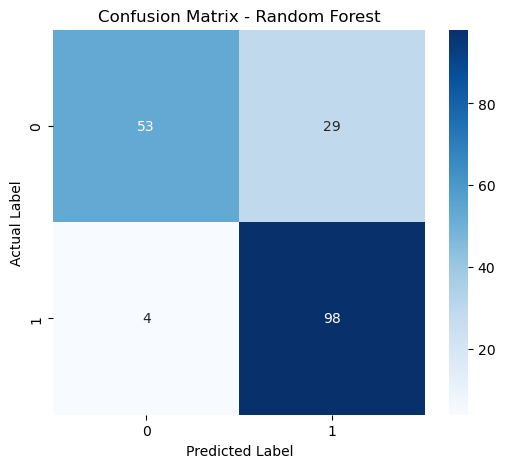

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions
rf_prob = rf_model.predict_proba(X_test)[:, 1]
threshold = 0.4
rf_predictions = (rf_prob >= threshold).astype(int)

# Confusion Matrix
cm = confusion_matrix(Y_test, rf_predictions)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

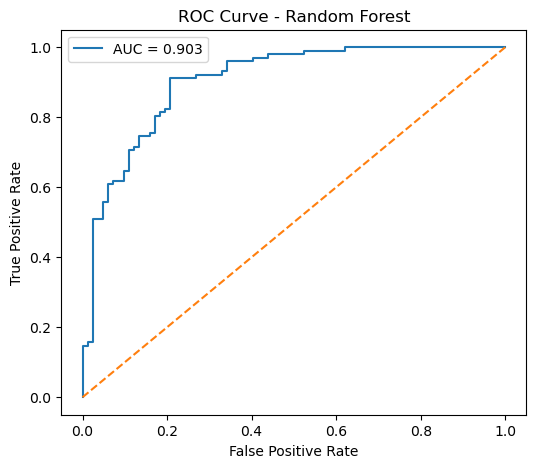

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC values
fpr, tpr, thresholds = roc_curve(Y_test, rf_probabilities)

# AUC Score
auc_score = roc_auc_score(Y_test, rf_probabilities)

# Plot
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

### Predictive System

In [47]:
# taking a sample value for test
X_test.iloc[100].values

array([ 45.,   1.,   2., 128., 308.,   0.,   2., 170.,   0.,   0.,   1.,
         0.,   3.])

In [48]:
def check_heart_disease(sample_index):
    
    if sample_index >= len(X):
        print(f"Invalid index! Max allowed index is {len(X)-1}")
        return
    
    # Keep feature names (avoids warning)
    input_data = pd.DataFrame(
        [X.iloc[sample_index]], 
        columns=X.columns
    )
    
    # Get probability
    prob = rf_model.predict_proba(input_data)[0][1]
    
    threshold = 0.4
    prediction = 1 if prob >= threshold else 0
    
    actual_label = Y.iloc[sample_index]
    
    print("="*40)
    print(f"Record Index: {sample_index}")
    print(f"Actual Label: {actual_label}")
    print(f"Predicted Probability: {round(prob,3)}")
    
    if prediction == 0:
        print("Model Prediction: NO Heart Disease")
    else:
        print("Model Prediction: Heart Disease Detected")
    
    print("="*40)

## Checking the result

In [49]:
check_heart_disease(1)

Record Index: 1
Actual Label: 1
Predicted Probability: 0.922
Model Prediction: Heart Disease Detected


In [50]:
check_heart_disease(32)

Record Index: 32
Actual Label: 1
Predicted Probability: 0.354
Model Prediction: NO Heart Disease


In [51]:
check_heart_disease(188)

Record Index: 188
Actual Label: 1
Predicted Probability: 0.488
Model Prediction: Heart Disease Detected


In [52]:
check_heart_disease(18800)

Invalid index! Max allowed index is 919


## Exporting Pickle file for deploying model

In [53]:
import joblib

# Save trained Random Forest model
joblib.dump(rf_model, "heart_rf_model.pkl")

['heart_rf_model.pkl']

In [54]:
# saving feature names

In [55]:
X = heart_dataset.drop(["target"], axis=1)

In [56]:
feature_names = X.columns.tolist()
joblib.dump(feature_names, "feature_names.pkl")

['feature_names.pkl']

In [57]:
print(X.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [58]:
X.rename(columns={"thalachh": "thalach"}, inplace=True)

In [59]:
# checking min and max probability that can come from model(randomforest)
y_prob = rf_model.predict_proba(X_test)[:, 1]

print("Minimum Probability:", y_prob.min())
print("Maximum Probability:", y_prob.max())

Minimum Probability: 0.04772996405463997
Maximum Probability: 0.9656164133035172


In [60]:
all_prob = rf_model.predict_proba(pd.concat([X_train, X_test]))[:,1]

print("Overall Min:", all_prob.min())
print("Overall Max:", all_prob.max())

Overall Min: 0.033765061655715106
Overall Max: 0.9656164133035172


In [61]:
import pandas as pd
import joblib

model = joblib.load("heart_rf_model.pkl")
importance = pd.Series(model.feature_importances_, index=feature_names)
print(importance.sort_values(ascending=False))

cp          0.224009
oldpeak     0.130031
exang       0.109402
chol        0.106720
thalach     0.100868
age         0.089523
sex         0.063399
thal        0.054955
trestbps    0.046887
ca          0.026579
slope       0.016824
restecg     0.015511
fbs         0.015292
dtype: float64


In [62]:
import pandas as pd

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_df

,Feature,Importance
2,cp,0.224009
9,oldpeak,0.130031
8,exang,0.109402
4,chol,0.106720
7,thalach,0.100868
0,age,0.089523
1,sex,0.063399
12,thal,0.054955
3,trestbps,0.046887
11,ca,0.026579


In [63]:
df[df.target==0].head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0


In [64]:
import numpy as np

# Get probabilities for entire dataset used in training
all_prob = rf_model.predict_proba(pd.concat([X_train, X_test]))[:, 1]

max_index = np.argmax(all_prob)
max_prob = all_prob[max_index]

print("Max Probability:", max_prob)
print("Index of Max Probability:", max_index)

Max Probability: 0.9656164133035172
Index of Max Probability: 893


In [65]:
full_data = pd.concat([X_train, X_test]).reset_index(drop=True)

print(full_data.iloc[max_index])

age          60.0
sex           1.0
cp            4.0
trestbps    145.0
chol        282.0
fbs           0.0
restecg       2.0
thalach     142.0
exang         1.0
oldpeak       2.8
slope         2.0
ca            2.0
thal          7.0
Name: 893, dtype: float64


In [66]:
import sklearn
print(sklearn.__version__)

1.6.1
